In [174]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.optimize import curve_fit
from scipy import stats
from scipy import odr

In [52]:
def read_csv(percorso):
    return pd.read_csv(percorso,delimiter=',', names=["V", "I"])

In [53]:
df1 = read_csv(r"C:\Users\dario\OneDrive\Desktop\università\Laurea_Triennale\Tesi_triennale\laboratorio\memristor 1 (riprendere le misure)\TriangleUpDown\1\IV\Memristor.csv")

# dataset I-V
# memristor 1
# T = 10 ms
# 3 impulsi
# Triangle UpDown waveform

In [54]:
df8 = read_csv(r"C:\Users\dario\OneDrive\Desktop\università\Laurea_Triennale\Tesi_triennale\laboratorio\memristor 8 ok (no funziona benissimo)\TriangleUpDown\1000 ok\I_V\Memristor.csv")

In [55]:
df4 = read_csv(r"C:\Users\dario\OneDrive\Desktop\università\Laurea_Triennale\Tesi_triennale\laboratorio\memristor 4\TriangleUpDown\1000 ok\8 impulsi triangolari\IV\Memristor.csv")
# dataset I-V
# memristor 4
# T = 1000 ms
# 8 impulsi
# Triangle UpDown wavefor

# print(df4.to_string())   Mostra tutto il dataset senza troncamenti

## Merge df function

definisco una funzione che mi serve quando prendo misure ripetute di I vs V.
Esso funzione se all'interno di una sola cartella (il cui percorso sarà chiamato "base_codice") ci sono 10 cartelle chiamate "giro 1", "giro 2", etc..

Essa resistuisce in output il dataframe unito e la lista contenente tutti i dataframe, che mi servirà come base per il ciclo for della funzione "get_g_list", che cicla su tutti e 10 i dataset e restituisce 

In [113]:
def merge_df(base_codice):
#     base_codice = r"C:\Users\dario\OneDrive\Desktop\università\Laurea_Triennale\Tesi_triennale\laboratorio\memristor 14\TriangleUpDown"
    files = [fr"{base_df14}\giro {i}\Memristor.csv" for i in range(1, 11)]
    df_list = [read_csv(file).assign(giro=i) for i, file in enumerate(files, start=1)]
    df = pd.concat(df14_list, ignore_index=True)

    return df, df_list

In [114]:
base_df14 = r"C:\Users\dario\OneDrive\Desktop\università\Laurea_Triennale\Tesi_triennale\laboratorio\memristor 14\TriangleUpDown"
df14, df14_list = merge_df(base_df14)
df14.head()


,V,I,giro
0,0.004371,0.126525,1
1,0.019428,0.187558,1
2,0.034485,0.316712,1
3,0.049542,0.377745,1
4,0.064599,0.472838,1


In [58]:
base_df12 = r"C:\Users\dario\OneDrive\Desktop\università\Laurea_Triennale\Tesi_triennale\laboratorio\memristor 12\TriangleUpDown\studio con 10 impulsi\500 OK"

df12 = merge_df(base_df12)
df12.head()


,V,I,giro
0,0.004371,0.126525,1
1,0.019428,0.187558,1
2,0.034485,0.316712,1
3,0.049542,0.377745,1
4,0.064599,0.472838,1


In [59]:
# questa funzione è per far vedere che ogni ciclo ha 200 punti e che il programma li divide in 4 parti eguali
def plt_4(df):
    colors = ["gray","red","blue","green"]
    for i in range(4):
        plt.scatter(df["V"][i*50: (i+1)*50],df["I"][i*50:(i+1)*50], color = colors[i], s = 10)
    
    plt.title("suddisione ciclo di isteresi")
    plt.ylabel("Current ($\mu$A)")
    plt.xlabel("Voltage (V)")

In [60]:
# def g_fit(df, n_cycle, v_down, v_up, v_min, plot=True):
#     p_for_cycle = 200
#     V = df["V"]
#     I = df["I"]
    
#     # g_low
#     df1 = df[int((n_cycle - 1)*p_for_cycle) : int((n_cycle - 3/4)*p_for_cycle)] # first part of the cycle
#     df4 = df[int((n_cycle - 1/4)*p_for_cycle) : int(n_cycle*p_for_cycle)] #last part of the cycle
#     df1 = df1[(df1["V"] < v_up) & (df1["I"] < 10)]
#     df4 = df4[df4["V"] > v_down]
#     merged_df_low = pd.concat([df4, df1])
    
#     # g_high
#     df2 = df[int((n_cycle - 3/4)*p_for_cycle) : int((n_cycle - 2/4)*p_for_cycle)] # second part of the cycle
#     df3 = df[int((n_cycle - 2/4)*p_for_cycle) : int((n_cycle - 1/4)*p_for_cycle)] #third part of the cycle
#     df3 = df3[df3["V"] > v_min]
#     merged_df_high = pd.concat([df3, df2])

    
#     def line(x, a, b):
#         return a * x + b
    
#     par_l, cov_l = curve_fit(line, merged_df_low["V"], merged_df_low["I"], p0=[0, 1])
#     par_h, cov_h = curve_fit(line, merged_df_high["V"], merged_df_high["I"], p0=[0, 1])
    
#     fig = None
#     if plot:
#         fig = plt.figure()
#         plt.plot(merged_df_low["V"], line(merged_df_low["V"], *par_l), color="red",
#                  label="G_low = {:.2f} ± {:.2f} µS".format(par_l[0], np.sqrt(cov_l[0, 0])))
#         plt.plot(merged_df_high["V"], line(merged_df_high["V"], *par_h), color="blue",
#                  label="G_high = {:.2f} ± {:.2f} µS".format(par_h[0], np.sqrt(cov_h[0, 0])))
#         plt.scatter(df["V"][int((n_cycle - 1) * p_for_cycle) : int(n_cycle * p_for_cycle)],
#                     df["I"][int((n_cycle - 1) * p_for_cycle) : int(n_cycle * p_for_cycle)],
#                     s=6, color="blue", alpha=0.3, label="cycle {}".format(n_cycle))
#         plt.legend()
#         plt.xlabel("Voltage (V)")
#         plt.ylabel("Current (µA)")
#         plt.title("Conductances fits  with curve_fit")
#         plt.show()
# #     print("numero di cicli: {}".format(len(df)//200))
#     return par_l, par_h

# Linear Regression with scipy.odr

In [176]:
def g_fit_(df, n_cycle, v_down, v_up, v_min, plot=True, ax = None):
    
    # definisco il modello lineare che sarà input di odr.Model()
    
    def get_par(df, n_cycle, v_down, v_up, v_min, plot=False):
        p_for_cycle = 200
        V = df["V"]
        I = df["I"]

        # g_low
        df1 = df[int((n_cycle - 1)*p_for_cycle) : int((n_cycle - 3/4)*p_for_cycle)] # first part of the cycle
        df4 = df[int((n_cycle - 1/4)*p_for_cycle) : int(n_cycle*p_for_cycle)] #last part of the cycle
        df1 = df1[(df1["V"] < v_up) & (df1["I"] < 10)]
        df4 = df4[df4["V"] > v_down]
        merged_df_low = pd.concat([df4, df1])

        # g_high
        df2 = df[int((n_cycle - 3/4)*p_for_cycle) : int((n_cycle - 2/4)*p_for_cycle)] # second part of the cycle
        df3 = df[int((n_cycle - 2/4)*p_for_cycle) : int((n_cycle - 1/4)*p_for_cycle)] #third part of the cycle
        df3 = df3[df3["V"] > v_min]
        merged_df_high = pd.concat([df3, df2])


        def line(x, a, b):
            return a * x + b

        par_l, cov_l = curve_fit(line, merged_df_low["V"], merged_df_low["I"], p0=[0, 1])
        par_h, cov_h = curve_fit(line, merged_df_high["V"], merged_df_high["I"], p0=[0, 1])

        fig = None
        if plot:
            fig = plt.figure()
            plt.plot(merged_df_low["V"], line(merged_df_low["V"], *par_l), color="red",
                     label="G_low = {:.2f} ± {:.2f} µS".format(par_l[0], np.sqrt(cov_l[0, 0])))
            plt.plot(merged_df_high["V"], line(merged_df_high["V"], *par_h), color="blue",
                     label="G_high = {:.2f} ± {:.2f} µS".format(par_h[0], np.sqrt(cov_h[0, 0])))
            plt.scatter(df["V"][int((n_cycle - 1) * p_for_cycle) : int(n_cycle * p_for_cycle)],
                        df["I"][int((n_cycle - 1) * p_for_cycle) : int(n_cycle * p_for_cycle)],
                        s=6, color="blue", alpha=0.3, label="cycle {}".format(n_cycle))
            plt.legend()
            plt.xlabel("Voltage (V)")
            plt.ylabel("Current (µA)")
            plt.title("Conductances fits  with curve_fit")
            plt.show()
    #     print("numero di cicli: {}".format(len(df)//200))
        return par_l, par_h
    
    
    
    def linear_func(B, x):
        """Modello lineare per ODR: y = B[0] * x + B[1]"""
        return B[0] * x + B[1]

    p_for_cycle = 200
    R = 10000  # Ohm
    # g_low
    df1 = df[int((n_cycle - 1) * p_for_cycle) : int((n_cycle - 3/4) * p_for_cycle)]
    df4 = df[int((n_cycle - 1/4) * p_for_cycle) : int(n_cycle * p_for_cycle)]
    df1 = df1[(df1["V"] < v_up) & (df1["I"] < 10)]
    df4 = df4[df4["V"] > v_down]
    merged_df_low = pd.concat([df4, df1])

    # g_high
    df2 = df[int((n_cycle - 3/4) * p_for_cycle) : int((n_cycle - 2/4) * p_for_cycle)]
    df3 = df[int((n_cycle - 2/4) * p_for_cycle) : int((n_cycle - 1/4) * p_for_cycle)]
    df3 = df3[df3["V"] > v_min]
    merged_df_high = pd.concat([df3, df2])
    
   
    def calculate_errors(V):
        err_V = 10**-2 + V * 5 * 10**-3  # Accuracy - typical (|Vout| ≤ 1V): ±10mV ± 0.5%
        err_V *= np.sqrt(2) 
        err_I = err_V / R  
        return err_V, err_I
    
    err_V, err_I = calculate_errors(df["V"])
    
#     print(f"errori su V = {pd.DataFrame(err_V)}")
#     print(f"errori su I = {pd.DataFrame(err_I)}") #  err assoluti di I << err assoluti di V
    
    linear_model = odr.Model(linear_func) # prende il modello in input
    
    # fit con ODR per G_low
    V_low, I_low = merged_df_low["V"].values, merged_df_low["I"].values
    err_V_low, err_I_low = calculate_errors(V_low)
    
    # QUI STO USANDO COME PARAMETRI INIZIALI QUELLI CALCOLATI CON CURVE_FIT, IN MODO
    # DA OTTIMIZZARE L'ALGORITMO
    
    par_l_init, par_h_init = get_par(df, n_cycle, v_down, v_up, v_min, plot=False)
    
    data_low = odr.RealData(V_low, I_low, sx=err_V_low, sy=err_I_low) # prende in input i dati e i loro errori
    odr_low = odr.ODR(data_low, linear_model, beta0=par_l_init) # unisce linear_model e data_low dando valori di beta iniziali
    output_low = odr_low.run() # elabora i dati 
    par_l, cov_l = output_low.beta, output_low.cov_beta # output di valori e matrice di covarianza
    
    # nota bene: scipy.odr chiama "beta" il coefficiente B che definito nella funzione "linear_func(B, x)"

    # fit con ODR per G_high
    V_high, I_high = merged_df_high["V"].values, merged_df_high["I"].values
    err_V_high, err_I_high = calculate_errors(V_high)
    

    data_high = odr.RealData(V_high, I_high, sx=err_V_high, sy=err_I_high)
    odr_high = odr.ODR(data_high, linear_model, beta0=par_h_init) # unisce linear_model e data_low
#     odr_high = odr.ODR(data_high, linear_model, beta0=[1,0]) # unisce linear_model e data_low

    output_high = odr_high.run()
    par_h, cov_h = output_high.beta, output_high.cov_beta

    # plot opzionale
    
    if plot:
        if ax is None:
            fig, ax = plt.subplots()

        ax.plot(V_low, linear_func(par_l, V_low), color="red",
                 label="G_low = {:.2f} ± {:.2f} µS".format(par_l[0], np.sqrt(cov_l[0, 0])))
        ax.plot(V_high, linear_func(par_h, V_high), color="blue",
                 label="G_high = {:.2f} ± {:.2f} µS".format(par_h[0], np.sqrt(cov_h[0, 0])))
        ax.scatter(df["V"][int((n_cycle - 1) * p_for_cycle) : int(n_cycle * p_for_cycle)],
                    df["I"][int((n_cycle - 1) * p_for_cycle) : int(n_cycle * p_for_cycle)],
                    s=6, color="blue", alpha=0.3, label="cycle {}".format(n_cycle))
        plt.scatter(V_high, I_high, color = "green", s = 7)
#         plt.errorbar(V_high, I_high, err_I_high, err_V_high, color = "green")

        ax.legend()
        ax.set_xlabel("Voltage (V)")
        ax.set_ylabel("Current (µA)")
        ax.set_title("Conductances fits with scipy.odr")

    return par_l, par_h

In [177]:
len(df12)

20000

(array([6.99810827, 0.22587773]), array([2.36194323e+02, 2.28604075e-01]))

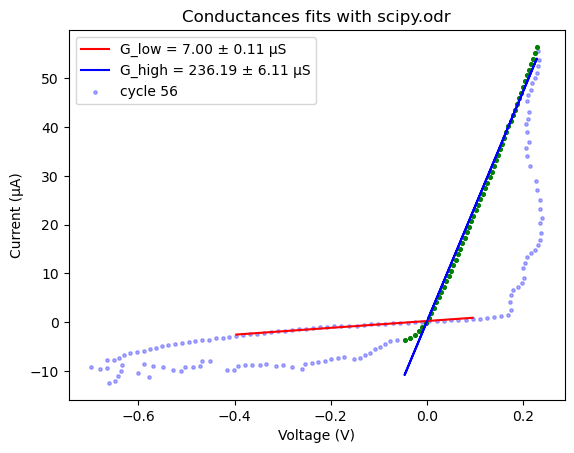

In [186]:
g_fit(df12,56,-0.4, 0.1, -0.05, plot = True)

(array([91.03901679,  1.31265948]), array([336.35442988,  -7.05296663]))

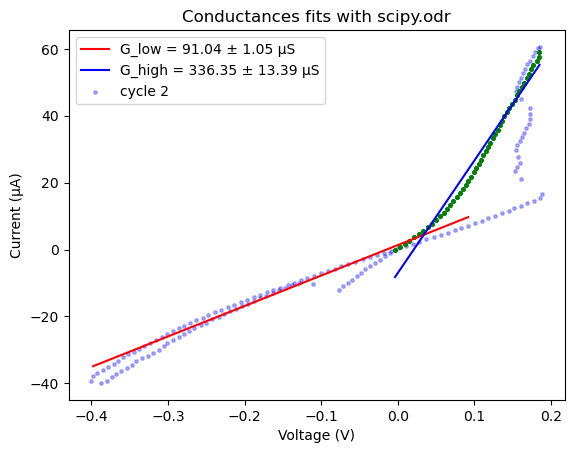

In [179]:
g_fit(df8,2,-0.4, 0.1, 0.1, plot = True) # non funziona benissimo

In [77]:
def plot_all_cycle(df):
    n = len(df) // 200
    cols = math.ceil(math.sqrt(n))
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3*rows))
    axes = axes.flatten()

    for i in range(n):
        g_fit(df, i + 1, -0.4, 0.1, -0.05, plot=True, ax=axes[i])

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    

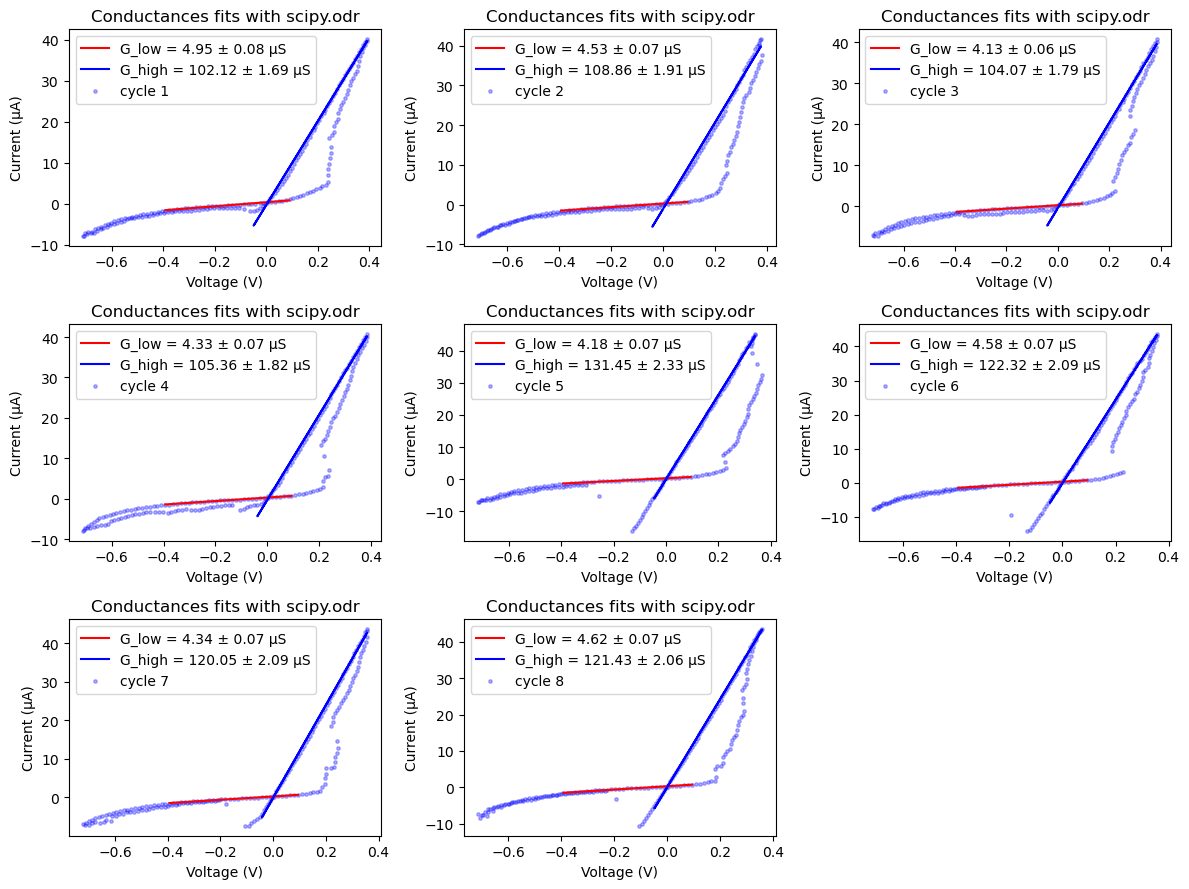

In [125]:
plot_all_cycle(df4)

(array([14.66265652,  0.37818766]), array([3.00152792e+02, 2.02729106e-01]))

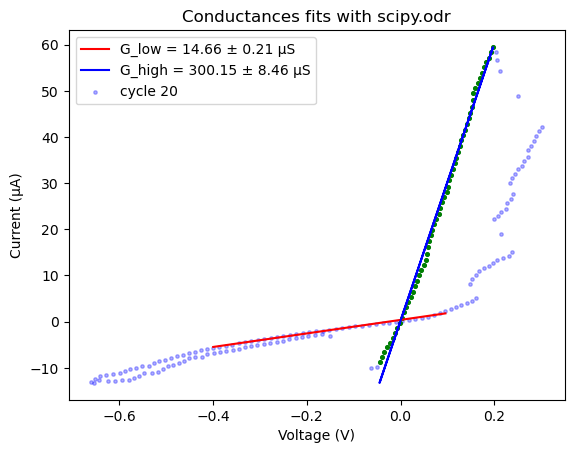

In [80]:
g_fit(df12,20,-0.4, 0.1, -0.05, plot = True)

In [ ]:
# questa funzione è per far vedere che ogni ciclo ha 200 punti e che il programma li divide in 4 parti eguali
def plt_4(df):
    colors = ["gray","red","blue","green"]
    for i in range(4):
        plt.scatter(df["V"][i*50: (i+1)*50],df["I"][i*50:(i+1)*50], color = colors[i], s = 10)
    
    plt.title("suddisione ciclo di isteresi")
    plt.ylabel("Current ($\mu$A)")
    plt.xlabel("Voltage (V)")

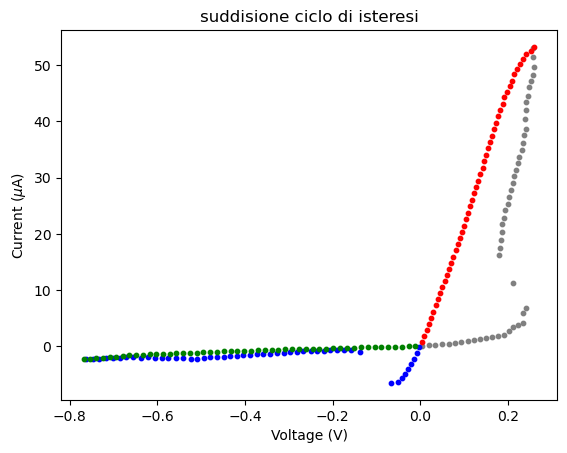

In [81]:
plt_4(df12)

# Conductances Variations plot

In [165]:
def get_g_list(df, num_memristor, plot = True):
    p_for_cycle = 200  # Numero di punti per ciclo
    num_cycles = len(df) // p_for_cycle  # Numero totale di cicli
    
    g_low_values = []
    g_high_values = []
    cycles = []
    
    for i in range(num_cycles):
        par_l, par_h = g_fit(df, i+1, -0.4, 0.2, -0.1, plot=False)
        g_low_values.append(par_l[0])
        g_high_values.append(par_h[0])
        cycles.append(i+1)
        
    print(f"Numero di cicli in totale: {num_cycles}")
    print(f"Vi sono {len(g_low_values)} valori delle coduttanze basse")
    print(f"Vi sono {len(g_high_values)} valori delle coduttanze alte")
    
    if plot:
        # G_high evolution plot
        fig1, ax1 = plt.subplots(figsize=(8, 4))
        ax1.plot(cycles, g_high_values, marker='o', linestyle='-', color='blue', label='$G_{{\mathrm{{HIGH}}}}$')
        ax1.set_xlabel("Cycle Number")
        ax1.set_ylabel("Conductance $G_{{\mathrm{{HIGH}}}}$ (µS)")
        ax1.set_title(f"Evolution of $G_{{\mathrm{{HIGH}}}}$ for {num_memristor}° Memristor")
        ax1.grid()
        plt.show()  

        # G_low evolution plot
        fig2, ax2 = plt.subplots(figsize=(8, 4))
        ax2.plot(cycles, g_low_values, marker='o', linestyle='-', color='red', label='$G_{{\mathrm{{LOW}}}}$')
        ax2.set_xlabel("Cycle Number")
        ax2.set_ylabel("Conductance $G_{{\mathrm{{LOW}}}}$ (µS)")
        ax2.set_title(rf"Evolution of $G_{{\mathrm{{LOW}}}}$ for {num_memristor}° Memristor")
        ax2.grid()
        plt.show()  
        
    return g_low_values, g_high_values

Numero di cicli in totale: 100
Vi sono 100 valori delle coduttanze basse
Vi sono 100 valori delle coduttanze alte


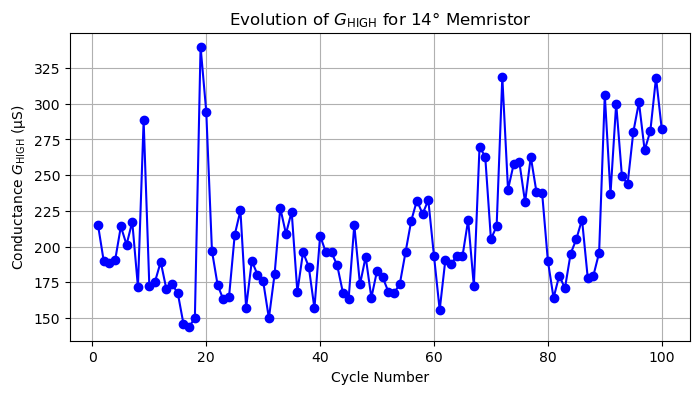

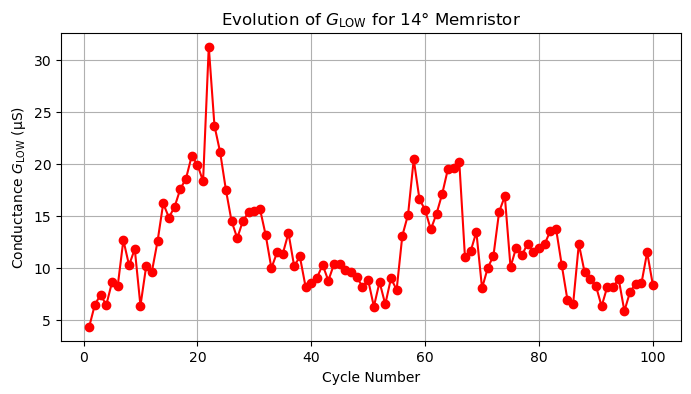

100

In [166]:
g_low14, g_high14 = get_g_list(df14, 14, True)
len(g_low14)

In [167]:
def plt_hist(lista, g_type, colore):
  
    bins = np.linspace(min(lista), max(lista), 15)
    
    # Crea il grafico
    plt.figure(figsize=(8, 5))
    plt.hist(lista, bins=bins, alpha=0.6, color=f'{colore}', label=f'{g_type}')
    
    # Etichette e titolo
    plt.xlabel("Conductance (µS)")
    plt.ylabel("Frequency")
    plt.title(f"Frequency Distribution of {g_type}")
    plt.grid()
    plt.show()
    

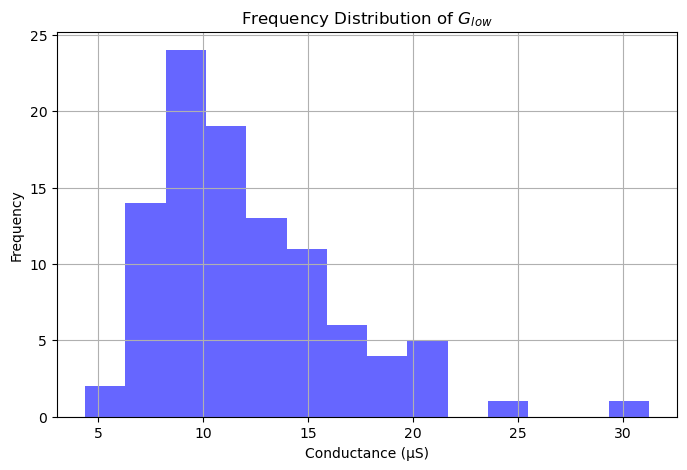

In [170]:
plt_hist(g_low14, "$G_{low}$", "blue")

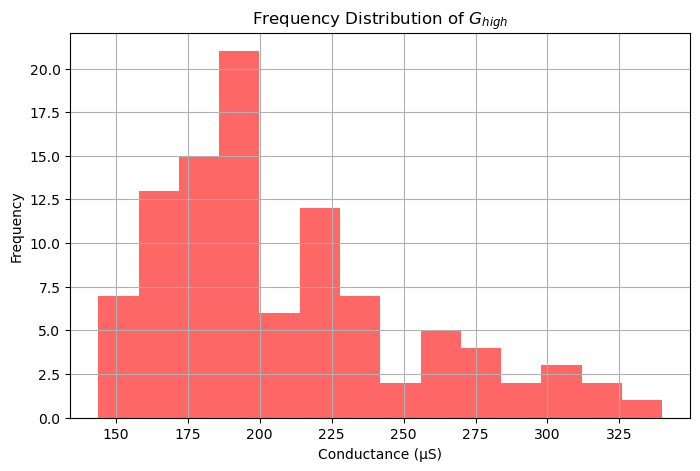

In [169]:
plt_hist(g_high14, "$G_{high}$", "red")

(array([3.25056234, 0.20280919]), array([188.01506928,   0.66291183]))

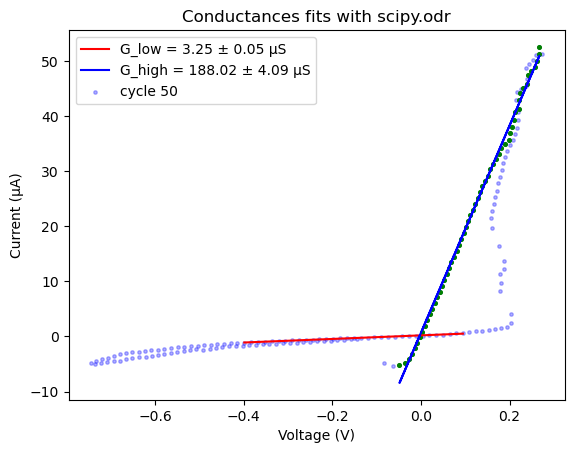

In [173]:
g_fit(df14,50,-0.4, 0.1, -0.05, plot = True)